## **📌 Step 1: Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
#loading the dataset
df = pd.read_csv('/content/application_data.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,118388.000000,118388.000000,118388.000000,1.183880e+05,1.183880e+05,118381.000000,1.182910e+05,118388.000000,118388.000000,118388.000000,...,118387.000000,118387.000000,118387.000000,118387.000000,102491.000000,102491.000000,102491.000000,102491.000000,102491.000000,102491.000000
mean,168672.364834,0.081503,0.418159,1.692683e+05,5.987499e+05,27086.449561,5.381481e+05,0.020854,-16031.233487,63537.140200,...,0.008227,0.000617,0.000541,0.000296,0.006596,0.007045,0.033515,0.266823,0.265223,1.892264
std,39640.774945,0.273607,0.721501,3.549378e+05,4.022156e+05,14540.850252,3.695663e+05,0.013818,4368.487524,141040.991118,...,0.090331,0.024824,0.023245,0.017192,0.085860,0.107976,0.202528,0.917401,0.611780,1.872099
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,134365.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19676.000000,-2756.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,168608.500000,0.000000,0.000000,1.440000e+05,5.124465e+05,24876.000000,4.500000e+05,0.018850,-15742.000000,-1216.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,203088.750000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12393.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,237281.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,24.000000,8.000000,25.000000


In [6]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
df.shape

(118388, 122)

In [9]:
# Select relevant columns
relevant_cols = [
    'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT'
]

df_filtered = df[relevant_cols]  # Keep only relevant columns

# Check the first few rows
df_filtered.head()


,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT
0,1,M,N,Y,0,202500.0,406597.5,24700.5,1.0,0.0
1,0,F,N,N,0,270000.0,1293502.5,35698.5,0.0,0.0
2,0,M,Y,Y,0,67500.0,135000.0,6750.0,0.0,0.0
3,0,F,N,Y,0,135000.0,312682.5,29686.5,NaN,NaN
4,0,M,N,Y,0,121500.0,513000.0,21865.5,0.0,0.0


In [10]:
df_filtered.isnull().sum()

,0
TARGET,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,7
AMT_REQ_CREDIT_BUREAU_YEAR,15897
AMT_REQ_CREDIT_BUREAU_QRT,15897


In [11]:
#drop null values
df_filtered.dropna(inplace=True)

<ipython-input-11-4eb783b2b9b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(inplace=True)


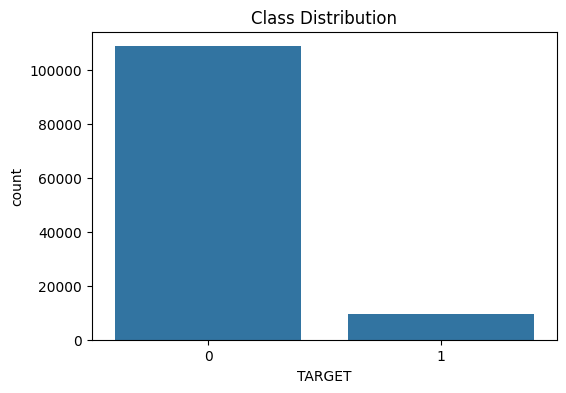

In [12]:
# Check class distribution (0 = No Fraud, 1 = Fraud)
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=df)
plt.title("Class Distribution")
plt.show()

In [13]:
# Encode categorical variables (Binary encoding)
df_filtered['CODE_GENDER'] = df_filtered['CODE_GENDER'].map({'M': 0, 'F': 1})
df_filtered['FLAG_OWN_CAR'] = df_filtered['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
df_filtered['FLAG_OWN_REALTY'] = df_filtered['FLAG_OWN_REALTY'].map({'N': 0, 'Y': 1})


<ipython-input-13-a61d0cfc7b52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CODE_GENDER'] = df_filtered['CODE_GENDER'].map({'M': 0, 'F': 1})
<ipython-input-13-a61d0cfc7b52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['FLAG_OWN_CAR'] = df_filtered['FLAG_OWN_CAR'].map({'N': 0, 'Y': 1})
<ipython-input-13-a61d0cfc7b52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

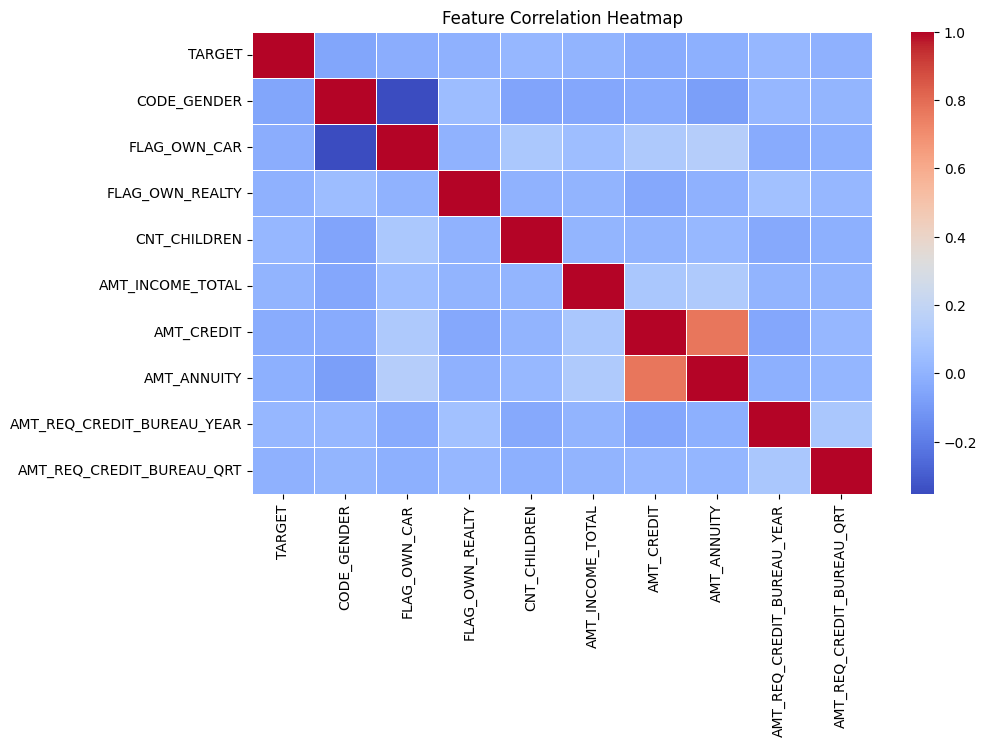

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## **📌 Step 2: Model Training**

In [19]:
X = df_filtered.drop(columns=['TARGET'])  # Features
y = df_filtered['TARGET']  # Target variable


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit-transform only the features (X), not the target (y)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [26]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", np.bincount(y_train_resampled))


Class distribution after SMOTE: [75584 75584]


In [27]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


## **📌 Step 3: Train Models**

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

## **📌 Step 4: Model Evaluation**

In [35]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

print("\nRandom Forest Model Evaluation:")
evaluate_model(rf_model, X_test, y_test)

print("\nXGBoost Model Evaluation:")
evaluate_model(xgb_model, X_test, y_test)



Random Forest Model Evaluation:
Confusion Matrix:
 [[18711   185]
 [ 1588    13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     18896
           1       0.07      0.01      0.01      1601

    accuracy                           0.91     20497
   macro avg       0.49      0.50      0.48     20497
weighted avg       0.85      0.91      0.88     20497

AUC-ROC Score: 0.49916474660470994

XGBoost Model Evaluation:
Confusion Matrix:
 [[18883    13]
 [ 1599     2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     18896
           1       0.13      0.00      0.00      1601

    accuracy                           0.92     20497
   macro avg       0.53      0.50      0.48     20497
weighted avg       0.86      0.92      0.88     20497

AUC-ROC Score: 0.5002806214733488


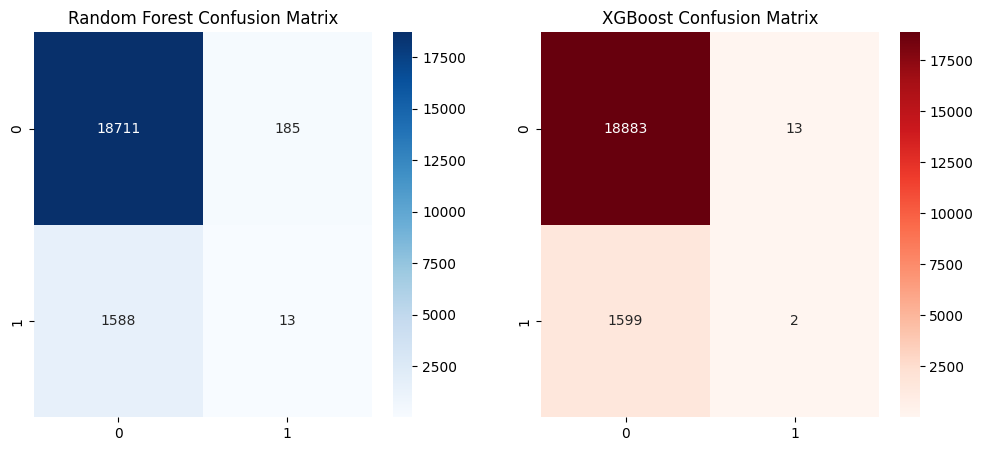

In [36]:
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Reds")
plt.title("XGBoost Confusion Matrix")

plt.show()


In [37]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)